<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22hw04_clustering%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ4. Кластеризация

## 1. Получение и подготовка данных

Вам предлагается сделать кластеризацию объектов датасете вин - https://www.openml.org/d/187.

Скачаем датасет, подставьте ссылку на скачивание датасета в ячейку ниже:

In [1]:
!wget https://www.openml.org/data/download/3624/dataset_191_wine.arff

--2024-07-17 15:17:54--  https://www.openml.org/data/download/3624/dataset_191_wine.arff
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14558 (14K) [text/plain]
Saving to: ‘dataset_191_wine.arff’

dataset_191_wine.ar 100%[===================>]  14.22K  --.-KB/s    in 0.004s  

2024-07-17 15:17:54 (3.32 MB/s) - ‘dataset_191_wine.arff’ saved [14558/14558]



In [2]:
import pandas as pd
from scipy.io.arff import loadarff

raw_data = loadarff('dataset_191_wine.arff')
df_data = pd.DataFrame(raw_data[0])
df_data

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,b'1',14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,b'1',13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,b'1',13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,b'1',14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,b'1',13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,b'3',13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,b'3',13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,b'3',13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,b'3',13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Видим пару проблем с данными:
- колонка `class` содержит в себе не числа, а бинарные строки - нужно поменять тип данных в колонке

In [3]:
df_data['class'] = df_data['class'].map({df_data['class'].unique()[0]:1,
                                         df_data['class'].unique()[1]:2,
                                         df_data['class'].unique()[2]:3})
df_data

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
df_data.tail()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
173,3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,3,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


- колонка после `hue` имеет нехорошее имя - надо исправить на `OD280_to_OD315_of_diluted_wines`:

In [5]:
df_data.rename(columns={'OD280%2FOD315_of_diluted_wines': 'OD280_to_OD315_of_diluted_wines'}, inplace=True)
df_data

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_to_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
df_data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_to_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Теперь остается разбить данные на матрицу признаков `X` и целевые классы `y` (их будем использовать при оценке качества):

In [7]:
y = df_data['class']
X = df_data.drop('class', axis=1)

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64

## 2. Метрики качества

Вам необходимо реализовать 1 внешнюю и 1 внутреннюю метрику качества.

**Внешние метрики** качества используют для оценки результатов модели полученные метки кластеров И некоторую дополнительную информацию о распределении (например, метки классов).

[Внешние метрики качества](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.92.D0.BD.D0.B5.D1.88.D0.BD.D0.B8.D0.B5_.D0.BC.D0.B5.D1.80.D1.8B_.D0.BE.D1.86.D0.B5.D0.BD.D0.BA.D0.B8_.D0.BA.D0.B0.D1.87.D0.B5.D1.81.D1.82.D0.B2.D0.B0):
- [Индекс Rand](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.98.D0.BD.D0.B4.D0.B5.D0.BA.D1.81_Rand)
- [Индекс Жаккара](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.98.D0.BD.D0.B4.D0.B5.D0.BA.D1.81_.D0.96.D0.B0.D0.BA.D0.BA.D0.B0.D1.80.D0.B0_.28.D0.B0.D0.BD.D0.B3.D0.BB._Jaccard_Index.29)
- [F-мера](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#F-.D0.BC.D0.B5.D1.80.D0.B0)

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix

def outer_metric(labels, predictions):
    """
    Индекс Rand
    """
    labels_arr = np.array(labels)
    predictions_arr = np.array(predictions)

    matrix = confusion_matrix(labels_arr, predictions_arr)
    diag_indices = np.diag_indices(matrix.shape[0])
    diagonal_elements = matrix[diag_indices]
    sum_of_diagonal = np.sum(diagonal_elements)
    total = matrix.sum()

    return sum_of_diagonal/total

**Внутренние метрики** качества используют для оценки результатов модели только полученные метки кластеров.

[Внутренние метрики качества](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.92.D0.BD.D1.83.D1.82.D1.80.D0.B5.D0.BD.D0.BD.D0.B8.D0.B5_.D0.BC.D0.B5.D1.80.D1.8B_.D0.BE.D1.86.D0.B5.D0.BD.D0.BA.D0.B8_.D0.BA.D0.B0.D1.87.D0.B5.D1.81.D1.82.D0.B2.D0.B0):
- [Силуэтный индекс](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.A1.D0.B8.D0.BB.D1.83.D1.8D.D1.82_.28.D0.B0.D0.BD.D0.B3.D0.BB._Silhouette.29)
- [Индекс Calinski-Harabasz](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.98.D0.BD.D0.B4.D0.B5.D0.BA.D1.81_Calinski.E2.80.93Harabasz)
- [Индекс Dunn](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8#.D0.98.D0.BD.D0.B4.D0.B5.D0.BA.D1.81_.D0.94.D0.B0.D0.BD.D0.BD.D0.B0_.28.D0.B0.D0.BD.D0.B3.D0.BB._Dunn_Index.29)


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import check_X_y

def inner_metric(X, labels):
    """
    Индекс Calinski-Harabasz
    """

    X, labels = check_X_y(X, labels)

    le = LabelEncoder()
    labels = le.fit_transform(labels)

    n_samples, _ = X.shape
    n_labels = len(le.classes_)

    extra_disp, intra_disp = 0.0, 0.0
    mean = np.mean(X, axis=0)
    for k in range(n_labels):
        cluster_k = X[labels == k]
        mean_k = np.mean(cluster_k, axis=0)
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2)
        intra_disp += np.sum((cluster_k - mean_k) ** 2)

    return (
        1.0
        if intra_disp == 0.0
        else extra_disp * (n_samples - n_labels) / (intra_disp * (n_labels - 1.0))
    )

## 3. Обучение модели и подбор гиперпараметров

Вам необходимо:
- выбрать одну из нижеуказанных моделей кластеризации
- обучить ее для разных значений гиперпараметра
- построить график зависимости реализованных Вами метрик качества от значения гиперпараметра

Модели кластеризации и их гиперпараметр:
- **K-Means** - количество кластеров $k$
- **DBSCAN** - радиус окрестности $\varepsilon$
- **Agglomerative Clustering** - количество кластеров $k$



Сколько взять значений гиперпараметров, какие брать значения гиперпараметров - это уже нужно решить вам, в этом и заключается ваша аналитическая работа :)

In [44]:
from sklearn.cluster import DBSCAN
import numpy as np
inner_metric_arr = []
outer_metric_arr = []

for e in np.linspace(1, 100, 40):
    clustering = DBSCAN(eps=e, min_samples=4).fit(X)
    res = clustering.labels_
    # print(res)
    outer_metric_arr.append(outer_metric(y,res))
    inner_metric_arr.append(inner_metric(X,res))



<ipython-input-10-adf8b08ab60c>:28: RuntimeWarning: divide by zero encountered in scalar divide
  else extra_disp * (n_samples - n_labels) / (intra_disp * (n_labels - 1.0))
<ipython-input-10-adf8b08ab60c>:28: RuntimeWarning: divide by zero encountered in scalar divide
  else extra_disp * (n_samples - n_labels) / (intra_disp * (n_labels - 1.0))
<ipython-input-10-adf8b08ab60c>:28: RuntimeWarning: divide by zero encountered in scalar divide
  else extra_disp * (n_samples - n_labels) / (intra_disp * (n_labels - 1.0))


In [45]:
data_for_plotting = pd.DataFrame(
    {'Epsilon': np.linspace(1, 100, 40),
    'outer_metric': outer_metric_arr,
    'inner_metric': inner_metric_arr}
)
data_for_plotting.set_index('Epsilon', inplace=True)

<Axes: xlabel='Epsilon', ylabel='outer_metric'>

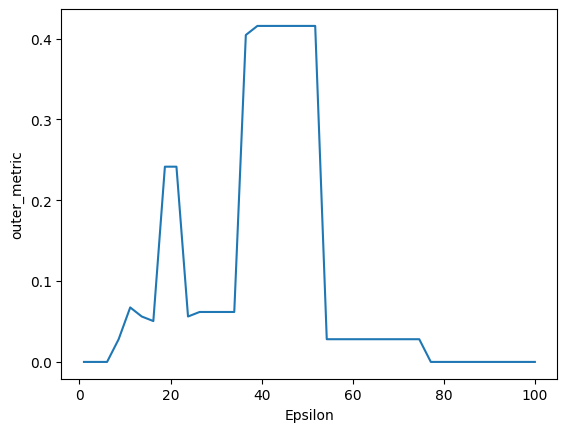

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=data_for_plotting, x='Epsilon', y ='outer_metric')


<Axes: xlabel='Epsilon', ylabel='inner_metric'>

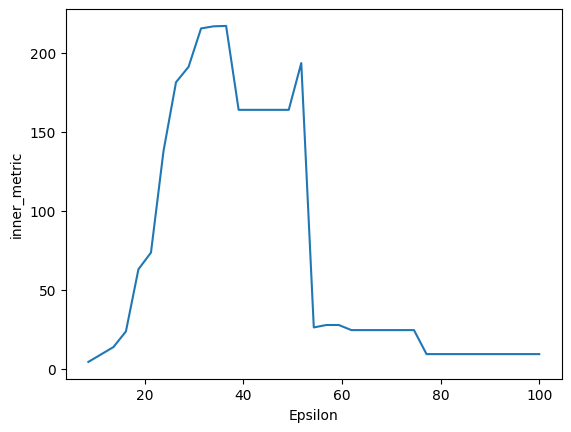

In [49]:
sns.lineplot(data=data_for_plotting, x='Epsilon', y ='inner_metric')